# DSUA-111 Project Example

Jeff Jacobs, jpj251@nyu.edu

## Part 1: Pre-Step

**Q1**: Describe briefly the question you would like to answer or the topic you would like to explore. Essentially, what do you hope to learn from your analysis?

Before starting grad school I worked as a development economist, where nearly every "bad" aspect of a nation's political economy (low GDP growth, high infant mortality rate, etc.) is attributed to something "internal" to the nation in its present form (not enough free markets!), rather than the historical context of how the country got to where it is now. The problem with ignoring this aspect of a country's political economy is that it conveniently sweeps under the rug the decades (and often centuries) during which the nation's economy was *not* under its own control, but rather under the control of its colonizer. Thus I am interested in quantitatively studying the impacts of colonialism on present-day socioeconomic conditions of a country.

## Part 2: Data

**Q2**: Find a dataset that may help you explore at least some of these questions. **First**, describe where you found the data set. **Second**, describe how you found it. **Third**, describe at least two variables in the dataset that are relevant to the analysis you described above. **Finally**, describe the unit of observation (individual, city, etc.).

As mentioned in the previous response, I'm interested in the linkage between the colonial history of a country and present-day measures of its socioeconomic "development".

So, I looked for a dataset on colonial history, and found one here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/5EMETG by searching "colonialism dataset" on Google. Actually, first I found this one: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UQZFYA but it (bafflingly) commits the *cardinal sin* we learned in this course, namely, selecting on the dependent variable -- it *only* includes colonized countries, and omits non-colonized countries (for example, the countries *doing* the colonization).

Then, I looked for a dataset on present-day socioeconomic conditions that development economists care about. Although there are tons of options here, I went with the WHO's dataset on global life expectancy by country here: https://apps.who.int/gho/data/node.main.688?lang=en (which I found by searching "life expectancy by country" on Google) since the WHO provides a particularly nice interface for filtering data: I only wanted the *most recent* life expectancy estimates for every country, and I was able to use that interface to easily drop all years besides 2016 and download the 2016-only dataset.

So, the two variables in these datasets that are relevant to the analysis I'd like to perform are:

1. `IndDate` from the colonial history dataset, which records the year and month of the country's independence, and
2. `Life expectancy at birth (Years)` from the life expectancy dataset, which records the life expectancy expected for the average person born in the country in 2016.

The unit of observation, in both cases, is a country.

**Q3**: If you could change this dataset in one way to make it better for your analysis, what would that change be and how could it improve your analysis?

Well, one massively important variable that's left out of the data I have here is *which* other country was the colonizer of a given country. Having this variable would improve my analysis because it would allow me to *control for* the differential effects of different colonial regimes on the public health of a given country.

For example, historians of European colonialism often point to Belgium as one of the "harshest" colonial regimes with respect to the negative effects of their colonial policies on public health (see, for example, the book *Leopold's Ghost* by Adam Hochschild), so we'd expect that former Belgian colonies would have lower life expectancies than non-Belgian colonies, as an effect operating *independently of* the number of years since decolonization.

**Q4**: Import the dataset into Jupyter using any method you like and show the first five observations.  If you had to do any pre-work to get the data into an uploadable format please describe it briefly. (If you didn’t, please say so as well.)

First things first, I wrote a bunch of code for checking which countries were in one dataset but not the other, and which countries had different names in the two datasets (for example, the life expectancy dataset listed Venezuela as `"Venezuela (Bolivarian Republic of)"` whereas the colonialism dataset listed it as just `"Venezuela"`). But it got a bit overly-complicated for the purposes of this class, so I decided instead to just manually update the names and delete the only-in-one-dataset rows from the `.csv` files. But I'm happy to send the code for auto-cleaning to anyone interested. Now the actual importing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here I'll show what the raw data looks like right when we load it, but it'll need a bit of cleaning before we can use it:

In [3]:
life_df = pd.read_csv("life_exp.csv")

In [4]:
life_df.head()

,Unnamed: 0,Unnamed: 1,Life expectancy at birth (years),Life expectancy at birth (years).1,Life expectancy at birth (years).2,Life expectancy at age 60 (years),Life expectancy at age 60 (years).1,Life expectancy at age 60 (years).2,Healthy life expectancy (HALE) at birth (years),Healthy life expectancy (HALE) at birth (years).1,Healthy life expectancy (HALE) at birth (years).2,Healthy life expectancy (HALE) at age 60 (years),Healthy life expectancy (HALE) at age 60 (years).1,Healthy life expectancy (HALE) at age 60 (years).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
1,Afghanistan,2016,62.7,61.0,64.5,16.3,15.5,17.1,53.0,52.1,54.1,11.3,10.9,11.7
2,Albania,2016,76.4,74.3,78.6,20.8,19.4,22.3,68.1,66.7,69.6,16.3,15.3,17.4
3,Algeria,2016,76.4,75.4,77.4,21.9,21.4,22.5,65.5,65.4,65.6,15.8,15.7,15.8
4,Angola,2016,62.6,60.3,64.9,17.3,16.5,18.1,55.8,53.8,57.7,13.6,12.9,14.3


But this is pretty gross -- really we just want to keep the country, year, and life expectancy variables:

In [5]:
# Keep only rows from 1 onwards (row 0 is just another row of variable labels),
# and only the first 3 columns
life_df = life_df.iloc[1:,0:3]
# Now that we only have 3 columns, we can set their names manually
life_df.columns = ["country","year","life_exp"]
# Finally, this is subtle but important: when loading the data, Pandas
# interpreted life_exp as a *string* instead of a *float* for some reason,
# so we need to use pd.to_numeric() to manually force it to be a column of
# float values
life_df["life_exp"] = pd.to_numeric(life_df["life_exp"])

In [6]:
life_df.head()

,country,year,life_exp
1,Afghanistan,2016,62.7
2,Albania,2016,76.4
3,Algeria,2016,76.4
4,Angola,2016,62.6
5,Antigua and Barbuda,2016,75.0


Much better. Now we do the same thing for the colonial independence dataset:

In [7]:
col_df = pd.read_csv("coldata110.csv", dtype=str, header=None)

In [8]:
col_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,700,Afghanistan,200,200,191908,0,2,-9,-9,-9,-9,-9,191908,191905,G&W add earlier indep from 1/1/1816-12/30/1888
1,339,Albania,640,640,191307,1,2,-9,-9,-9,-9,-9,191401,191301,COW system interrupted 4/1939-11/1944 (Ital/Ge...
2,615,Algeria,220,220,196207,1,2,-9,-9,-9,-9,-9,196207,196207,G&W add earlier indep from 1/1/1816-7/5/1830
3,540,Angola,235,235,197511,1,2,-9,-9,-9,-9,-9,197511,197511,-9
4,58,Antigua and Barbuda,200,200,198111,0,2,-9,-9,-9,-9,-9,198111,-9,Includes Antigua/Barbuda/Redonda islands


Again, pretty gross. So we clean:

In [9]:
# The only columns we really need are the two labeled
# 1 (the country name) and 4 (the date of independence)
col_df = col_df[[1,4]].copy()
# Now that we only have 2 columns, we can set their names manually
col_df.columns = ["country","ind_date"]
# Finally, we want to derive a continuous variable yrs_since_ind
# from the string variable ind_date, so we use a lambda function
# to instruct Pandas on how to transform each ind_date value
col_df["yrs_since_ind"] = col_df["ind_date"].apply(lambda x: 2016 - int(x[:4]))

In [10]:
col_df.head()

,country,ind_date,yrs_since_ind
0,Afghanistan,191908,97
1,Albania,191307,103
2,Algeria,196207,54
3,Angola,197511,41
4,Antigua and Barbuda,198111,35


Finally, we merge these two datasets together using Pandas' `merge()` function, so that we have a *single* DataFrame we can use for our analysis and regression:

In [11]:
merged_df = col_df.merge(life_df, on="country", how="left", indicator=True)

This checks to see if there are any rows in `col_df` that it couldn't merge with `life_df`. If a country was only found in `col_df`, the `_merge` column for that country will have the value `"left_only"`, whereas if a country was found in both and successfully merged the `_merge` value will instead be `"both"`. (Countries only found in the *life expectancy* data would theoretically be labelled `"right_only"`, except that I specified that I *don't* want these countries to be included via the `how="left"` argument in the `merge()` call above.)

In [12]:
merged_df[merged_df["_merge"] != "both"]

,country,ind_date,yrs_since_ind,year,life_exp,_merge


Great, no failures in the merge! So we can drop the `_merge` variable:

In [13]:
merged_df.drop(columns=["_merge"], inplace=True)

Now let's look at the first 5 rows of our new combined DataFrame and move to the next part:

In [14]:
merged_df.head()

,country,ind_date,yrs_since_ind,year,life_exp
0,Afghanistan,191908,97,2016,62.7
1,Albania,191307,103,2016,76.4
2,Algeria,196207,54,2016,76.4
3,Angola,197511,41,2016,62.6
4,Antigua and Barbuda,198111,35,2016,75.0


## Part 3: Initial Analysis

**Q5**: Conduct **at least two different manipulations** of your now-ready table that help you understand something of interest about the dataset (e.g., you might explore options like `sort_values()`, `shape`, `value_counts()`, `groupby()`, etc.).  Why did you choose these two,  and what have you learned?  (Hint: You may need to do a bit of work to get the data into a format that is usable for you -- e.g., renaming columns, changing data types, etc. If any of this was necessary, show your code and briefly explain why you made these changes)

**First**, I'll just use the `shape` property of my DataFrame to see how many rows and columns are in my dataset:

In [15]:
merged_df.shape

(183, 5)

So, from this I've learned that there are 183 total countries in my dataset, and that I have 5 pieces of information for each country.

**Second**, I'd like to use `sort_values()` to show me the general range of values that the `yrs_since_ind` variable takes on:

In [16]:
merged_df.sort_values(by="yrs_since_ind")

,country,ind_date,yrs_since_ind,year,life_exp
153,South Sudan,201107,5,2016,58.6
110,Montenegro,200606,10,2016,76.8
48,Timor-Leste,200205,14,2016,68.6
151,South Africa,199404,22,2016,63.6
53,Eritrea,199305,23,2016,65.0
...,...,...,...,...,...
8,Austria,128212,734,2016,81.9
132,Portugal,113907,877,2016,81.5
173,United Kingdom,106612,950,2016,81.4
45,Denmark,098000,1036,2016,81.2


So, from this second manipulation I've learned that there's a pretty wide range of ages: France, according to this dataset, has been independent from "colonial" powers (though people in 943 wouldn't have thought of what they were doing as "decolonization" obviously) since 943 A.D., whereas South Sudan only became an independent nation in 2011.

**Q6**: Generate **two different types of graphs** of any kind that are useful to you to better understand what you're interested in.  They don't need to be formatted particularly beautifully, but you do need to use two different types of graphs (e.g., a bar chart and a scatterplot) and explain what you hoped to understand, why you chose these graphs, and whether they're useful in improving your understanding.

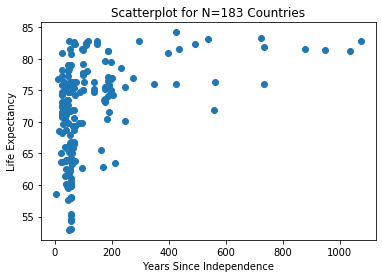

In [17]:
plt.scatter(x=merged_df["yrs_since_ind"], y=merged_df["life_exp"])
plt.xlabel("Years Since Independence")
plt.ylabel("Life Expectancy")
plt.title(f"Scatterplot for N={len(merged_df)} Countries")
plt.show()

Now, this scatterplot helps me see that a few countries have extremely large `yrs_since_ind` values, which hinders our ability to see the relationship displayed in the scatterplot because most of the points are bunched up on the left side of the plot. So, I *could* just choose some arbitrary threshold -- say, 600 years -- and remove all outlier countries with `yrs_since_ind` values greater than this. But (tying history/social science knowledge in with our data analysis, always a good thing to do if you can), there's actually a fairly solid rationale for choosing **368 years** as this threshold: namely, that in 1648 the [Treaty of Westphalia](https://en.wikipedia.org/wiki/Peace_of_Westphalia) was signed, thus inaugurating (in the eyes of many/most scholars of International Relations, at least) the modern notion of [territorial sovereignty](https://global.oup.com/academic/product/territorial-sovereignty-9780198833536?cc=us&lang=en&) in which we associate the abstract entity of a "state" or "nation" with a physical geographic territory over which the government of that "state"/"nation" has sovereign power.

So, with that in mind, I create a new DataFrame called `merged_df_tw` (`tw` standing for Treaty of Westphalia), containing only those countries that gained independence since 1648, and generate the same scatterplot using this new data so that we can more clearly see the relationship between our two variables of interest:

In [18]:
merged_df_tw = merged_df[merged_df["yrs_since_ind"] < 368].copy()

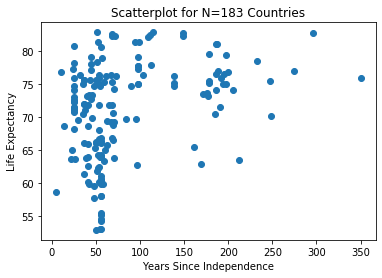

In [19]:
plt.scatter(x=merged_df_tw["yrs_since_ind"], y=merged_df_tw["life_exp"])
plt.xlabel("Years Since Independence")
plt.ylabel("Life Expectancy")
plt.title(f"Scatterplot for N={len(merged_df)} Countries")
plt.show()

And thus we conclude that the scatterplot *was* helpful for our analysis, since it helped us recognize the presence of outliers and, once those outliers were removed, it helped us see that there seems to be some sort of positive relationship between our two variables of interest, albeit probably not a linear one.

Next, I'll use `matplotlib`'s `boxplot()` function to create a box-and-whiskers plot of the life expectancy data, just so I can see what the median, quartiles, and range of the life expectancy variable look like:

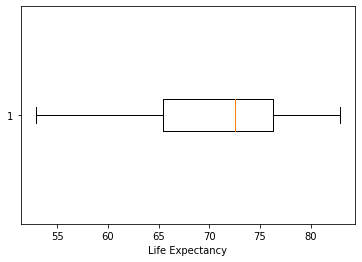

In [20]:
plt.boxplot(merged_df_tw["life_exp"], vert=False)
plt.xlabel("Life Expectancy")
plt.show()

And from this plot we can see that while the median life expectancy is somewhere around 73 years, 25% of countries still have a life expectancy less than ~65 years (the "whisker" spanning from ~53 to ~65). We would expect that a disproportionate number of these low-life-expectancy countries are recently-liberated colonies, based on our (alternative) hypothesis, but this plot can't show us *which* countries are in that whisker. So, it was a useful graph for getting a sense of the distribution of life expectancies in the dataset, but it would be more helpful if it allowed us to (say) mouse over the whisker and see which countries have life expectancies in that range.

## Part 4: Hypothesis Formulation

**Q7**: What is your dependent variable and independent variable? Briefly describe how they are measured in this dataset. (Remember, they'll both need to be continuous variables.)

Given that I'm interested in present-day socioeconomic conditions as the *outcome* of colonization, the *dependent* variable in my theory is life expectancy and the *independent* variable is the amount of time the country has had to "develop" post-decolonization. Then, to operationalize these conceptual variables, life expectancy is measured here as the number of years that a child born in 2016 in a given country can expect to live while the amount of time a country had to "develop" is measured as the number of years it had from its independence date to 2016.

**Q8**: Calculate the correlation coefficient between your two variables and interpret the result.

Annoyingly, Pandas' `corr()` function insists on generating a correlation *matrix* for a DataFrame with 2 variables, instead of just a single number. So, we'll generate the matrix then use Pandas' `.loc[]` function to get the specific coefficient we want:

In [21]:
correlation_matrix = merged_df_tw[["yrs_since_ind","life_exp"]].corr()
correlation_matrix

,yrs_since_ind,life_exp
yrs_since_ind,1.000000,0.332302
life_exp,0.332302,1.000000


In [22]:
correlation_matrix.loc["yrs_since_ind","life_exp"]

0.33230186992247207

So, there is about a 33.23% correlation between years since independence and life expectancy, which is quite high as far as macroeconomic/social-scientific variables go (due to the millions of factors which go into these aggregate measures)

**Q9**: Write out your regression model as an equation.

The standard way to write a regression equation is with the *dependent* variable on the lefthand side of the equation and any *independent* vars (or potential confounding variables you've included) on the righthand side. In this case:

$$\text{life_exp} = \beta_0 + \beta_1 * \text{yrs_since_ind}$$

Where $\beta_0$ will be the *y-intercept* of the estimated regression line (the life expectancy value we'd expect to see for a country with *zero* years since independence, i.e., the estimated life expectancy upon gaining independence) and $\beta_1$ will be the *regression coefficient*, the estimated effect that a 1-year increase in years since independence would have on life expectancy.

**Q10**: Write out your null and alternative hypotheses.

Now that we have this regression equation, we can write the null and alternative hypotheses simply as:

* **H_0**: $\beta_1 = 0$ (an additional year of independence for a country has no effect on its life expectancy)
* **H_A**: $\beta_1 \neq 0$ (an additional year of independence for a country has an effect on its life expectancy)

## Part 5: Regression Analysis

**Q11**: Estimate the regression equation you specified above and show the regression output.

This is the part that you have *not* learned in lecture yet, but we'll use a library called `statsmodels` to carry out our regression analysis. This library *is* available to you on JupyterHub, as long as you make sure you're using the "dsua-111" environment rather than the "Python 3" environment. If you don't see "conda env:dsua-111" in the upper-righthand corner of your notebook, you can switch to this environment by clicking Kernel -> Change Kernel in the menubar and then selecting the "dsua-111" environment.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array(merged_df_tw["yrs_since_ind"]).reshape(-1,1)
y = merged_df_tw["life_exp"]
reg = LinearRegression().fit(X, y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Clearly not that useful to display `reg` on its own, but let's look at what properties it has:

In [ ]:
# This is the R^2 value
print(reg.score(X, y))
# This gives a list of coefficients
# [we only have one, the yrs_since_ind coefficients]
print(reg.coef_)
# This gives us the estimated y-intercept
# [i.e., the life expectancy we'd expect if yrs_since_ind was 0]
print(reg.intercept_)
# This lets us use the estimated regression line to
# predict values of life_exp based on values of yrs_since_ind
print(reg.predict(np.array([50]).reshape(-1,1)))



This `predict()` function is extremely useful, since it allows us to compute the residuals as follows:

In [37]:
# First, we compute what the model predicts for each of the
# *actual* X values (yrs_since_ind values) in the dataset
predictions = reg.predict(X)
# And let's look at the life expectancy it predicts for the first
# 10 countries:
predictions[:10]

array([71.58609578, 71.81844842, 69.9209019 , 69.41747119, 69.18511856,
       75.57481601, 68.79786417, 72.28315369, 68.79786417, 69.49492207])

In [39]:
# And now the residuals are just the difference between the
# values that our model predicts for y (life_exp) and the
# *actual* y values (life_exp values) in the dataset:
residuals = merged_df_tw["life_exp"] - predictions
residuals

0     -8.886096
1      4.581552
2      6.479098
3     -6.817471
4      5.814881
         ...   
178   -0.932660
179    6.069295
180   -4.427275
181   -7.543451
182   -7.823844
Name: life_exp, Length: 168, dtype: float64

So that now we can make our residual plot in Seaborn:

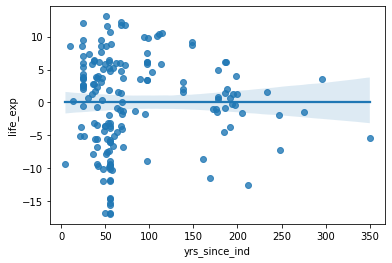

In [42]:
import seaborn as sns
sns.regplot(x="yrs_since_ind", y=residuals, data=merged_df_tw)
plt.show()

**Q12**: What do the results in the regression output tell you?  Interpret the coefficient, p-value, and confidence interval for your independent variable (you don't have to do the intercept) and the $R^2$.

First, we interpret the coefficient $\beta_1$ (for any regression) as: how much of an increase/decrease in the value of our *dependent* variable is associated with a 1-unit increase in the value of our *independent* variable. In this case: how many more/fewer years of life expectancy are associated with an additional year of independence:

In [863]:
beta_1 = result_tw.params["yrs_since_ind"]
print(f"A 1-year increase in yrs_since_ind is associated with an increase in life expectancy of {beta_1} years")

A 1-year increase in yrs_since_ind is associated with an increase in life expectancy of 0.03872543907633161 years


In [864]:
print(f"In other words, an additional year of life expectancy for every {1/beta_1} years of independence")

In other words, an additional year of life expectancy for every 25.822818897647686 years of independence


Next, we can look at the `P>|t|` column in the regression result table to get our $p$-value, which in this case is so low that, out to the three decimal places that `statsmodels` prints, it is indistinguishable from zero. Instead, we can use the `pvalues` property of the `result_tw` object to get the full $p$-value:

In [861]:
result_tw.pvalues["yrs_since_ind"]

1.0791308676096611e-05

And we can use this Python trick to display it in regular, non-scientific notation:

In [862]:
'%f' % (result_tw.pvalues["yrs_since_ind"])

'0.000011'

Which means that there is a 0.0011% chance that we'd see a test statistic as high as or higher than the test statistic we got for $\beta_1$, 4.539 (the value in the `t` column in the regression results table produced by `statsmodels` above), if the null hypothesis was true. In the language of bootstrap sampling we've been using in lecture/section, this roughly corresponds to generating 1 million simulated datasets (under the assumption that the null hypothesis is true, so that the life expectancy and years since independence for each country would be generated totally randomly and independently of one another), and only seeing 11 with a test statistic this extreme.

Next we can get the 95% confidence interval for $\beta_1$ by looking at the values in the two columns with the shared header `[0.025    0.975]`. In this case, for the `yrs_since_ind` row that we care about, the 95% confidence interval is `[0.022, 0.056]`, which means that if we repeatedly sampled life expectancy and years-since-independence data over and over again, we'd expect that 95% of the time the mean of these samples would lie between 0.022 and 0.056 (it's a bit contrived here, since we actually have almost the full population of all countries, but technically in frequentist statistics you're supposed to imagine "superpopulations" like alternate counterfactual universes that a particular "realized" population is sampled from...)

Finally, we get an $R^2$ value, listed in the righthand column of the regression results (directly underneath `OLS Regression Results`), of 0.011. There's actually a good amount of controversy in the statistics world about how to interpret an $R^2$ value, but often it's summarized as something like "x% of the variation in my dependent variable is 'explained by' my independent variable(s)." So, in this case, we can say something like "1.1% of the variation in life expectancy is 'explained by' the number of years since independence." Although this seems quite low, variables at this "macroscopic" level will often result in fairly low $R^2$ values, because so many millions of different factors go into and cause variation in these outcomes. One rule of thumb I learned as an economics student in undergrad went like: scientists who can control (almost) everything about their experiment can interpret an $R^2$ value above 0.3 as indicating a "strong" relationship between independent and dependent variables, whereas for microeconomists who study individual people this threshold is more like 0.15, and for macroeconomists who study entire national economies this threshold can be around 0.05. But this is a SUPER rough heuristic, so please don't quote me on it!

Now finally we'll use the nice plotting library `seaborn` instead of `matplotlib` to visualize our regression result, because it has a function `regplot()` specifically made for showing a regression line (with error band) superimposed on a scatterplot of the two variables:

In [865]:
import seaborn as sns

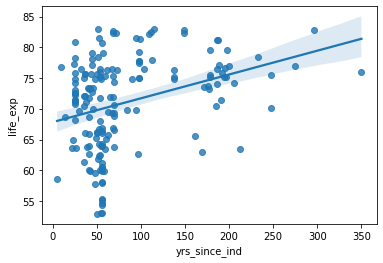

In [866]:
sns.regplot(x='yrs_since_ind', y='life_exp', data=merged_df_tw)
plt.show()

**Q13**: Which hypothesis do you reject or fail to reject, and why?

Because of our extremely low $p$-value (discussed above), by the "standard" scientific $p$-value cutoff of 0.05, we *reject* our null hypothesis (that number of years since independence has no effect on life expectancy), and thus interpret our finding as a piece of evidence supporting the alternative hypothesis (that number of years since independence *does* have an effect on life expectancy).

**Q14**: Generate the residual plot and comment on any heteroskedasticity. What does this imply for your inference?

A **residual plot** is just a scatterplot (or, even better, a `regplot`) where the x-axis is the independent variable as before (in the plots above), *but* the y-axis is now the *distance* between the regression line and the actual data points in the dataset. So, for example, if the dataset had a country with 150 years since independence and a life expectancy of 80 years, but the y-value of the *regression line* at x=150 years was 70.2, the y value for this point on the *residual* plot would be 80-70.2 = 9.8. Note that the residual can also be *negative* if the regression line "predicted" a value that was too high: if the dataset had a country with 100 years since independence and a life expectancy of 60 years, but the y-value of the *regression line* at x=100 years was 75.5, the residual for this data point would be 60-75.5 = -15.5.

As for that big word at the end of the first sentence of the question, "heteroskedasticity" is just the situation where the residuals, the errors in your regression line's "prediction" for each data point, are *correlated with* the independent variable. This is a bad thing, since the validity of the regression procedure *requires* the absence of heteroskedasticity (i.e., requires that the errors in the regression line's "predictions" be uncorrelated with the independent variable). Here, however, we see very little evidence for such a correlation, when we use `regplot` to plot the *residuals* (which we computed above) against the independent variable (years since independence) **[NOTE: This is the same as the plot we generated at the end of our answer to Q11]**:

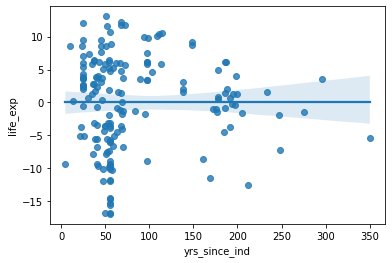

In [43]:
import seaborn as sns
sns.regplot(x="yrs_since_ind", y=residuals, data=merged_df_tw)
plt.show()

There seems to be very little heteroskedasticity, since the residual (the distance from every data point to the estimated regression line) doesn't exhibit any noticeable positive or negative trend -- for example, we don't see the residuals increasing or decreasing systematically with the `yrs_since_ind` variable.

## Part 6: Conclusions

**Q15**: What biases might be present in the sample itself that could be affecting the outcome?  Discuss at least two sources of bias.

One obvious bias in the sample itself is survivorship bias: since both datasets only contain countries that exist in 2016, we don't observe situations where a country gained independence but was then "merged into" another country. For example, [Zanzibar](https://en.wikipedia.org/wiki/Zanzibar) gained independence in 1963, but merged with Tanganyika in 1964 to form Tanzania; [Biafra](https://en.wikipedia.org/wiki/Biafra) seceded from Nigeria in 1967 but was re-absorbed into Nigeria in 1970. Similarly, we are unable to "track" differences in life expectancy between East and West Germany, despite the fact that they were independent nations for much of the 20th century (between 1949 and 1990).

**Q16**: Considering all the work you've done, including the regression output, the results  of  your hypothesis tests, and any biases present in the data, what conclusions, however tentative, can
you draw from your analysis about the relationship between your two variables of interest?

It's **very important** that my response to this question is tempered by the considerations in Q17. But, on the basis of the analysis above, one can conclude that it's not implausible that there's a link between the number of years since decolonization and the health outcomes in a given country.

**Q17**:  What is your analysis’s greatest weakness?  In other words, what are the best reasons to be cautious about what we can learn from it?

The $p$-value is low enough (indistinguishable from zero, given the number of decimal places that the `statsmodels` package displays) to be considered "statistically significant" in the classical statistics sense. Thus, going "by the book", we have resoundingly rejected the null hypothesis that the number of years of independence has no effect on the life expectancy of a country. However, a lot of subjective decisions were made -- specifically, when exactly to mark "independence" is extremely non-trivial.

To give just one example, did Serbia become "independent" when the Congress of Berlin recognized it as a sovereign nation in 1878? When it became part of the "Kingdom of the Serbs, Croats, and Slovenes" in 1918? When it was liberated from Nazi Germany after WWII and became part of Yugoslavia in 1945? Or when it became an independent nation after the collapse of Yugoslavia in 1992? If we *do* mark the date of liberation from Nazi occupation as the date of independence, don't we also need to change France's date of independence from 943 A.D. to 1945?

Issues like these make it imperative that we be *very* cautious when interpreting the results of super-basic linear regression analyses. Without controlling for confounders (e.g., the colonizing-country variable mentioned in Q3), and without doing a barrage of additional tests of *causality* (remember, linear regression is a test of *association*, not *causation*), it really is irresponsible to say something like "I've now shown that being colonized for longer causes a country to have a lower life expectancy!"